In [1]:
# Imports

In [1]:
# Setting up pyplot runtime configuration

from matplotlib.ticker import MaxNLocator

SMALL = 14
MEDIUM = 16
LARGE = 20
THICK = 4
THIN = 3
ONE_TIMES_ONE = (9,8)
TWO_TIMES_ONE = (20,8)
TWO_TIMES_TWO = (20,15)
OPACITY = .25


plt.style.context('fivethirtyeight')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='black', axisbelow=True, grid=True)
plt.rc('grid', color='white', linestyle='solid')
plt.rc('lines', linewidth=THICK)

plt.rc('font', size=MEDIUM, weight='bold')          # default text sizes
plt.rc('axes', titlesize=MEDIUM)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM)    # legend fontsize
plt.rc('figure', titlesize=LARGE)  # fontsize of the figure title

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
N = 2**(2*2)

def beta(T):
    return 1/T

def partition(T):
    return 12 + 4*np.cosh(8*beta(T))
    #return 12 + 2*np.exp(-8*beta(T)) + 2*np.exp(8*beta(T))

def expE(T):
    return -32/partition(T)*np.sinh(8*beta(T))

def varE(T):
    return 256/partition(T)*np.cosh(8*beta(T)) - (expE(T))**2

def expMabs(T):
    return 8/partition(T)*(np.exp(8*beta(T)) + 2)

def varMabs(T):
    return 32/partition(T)*(np.exp(8*beta(T)) + 1) - (expMabs(T))**2

def heat_capacity(T):
    return varE(T)/T**2

def susceptibility(T):
    return varMabs(T)/T

In [62]:
abs((-1.99598208593669-(-1.81818))/-1.99598208593669)

0.08908000086245747

In [72]:
T = 1
E = expE(T)/4
M = expMabs(T)/4
cV = heat_capacity(T)/4
chi = susceptibility(T)/4

df = pd.read_csv("./2x2/2x2-vals.csv", comment='#')
df['Eeps'] = np.abs((E - df['E'])/E)
df['CVeps'] = np.abs((cV - df['CV'])/cV)
df['Meps'] = np.abs((M - df['Mabs'])/M)
df['chieps'] = np.abs((chi - df['Chi'])/chi)

e_cols = ['N', 'E', 'Eeps', 'CV', 'CVeps']
m_cols = ['N', 'Mabs', 'Meps', 'Chi', 'chieps']

e_df = df[e_cols]
m_df = df[m_cols]
print(f'E={E}, M={M}, cV={cV}, chi={chi}')
print(e_df.to_latex(index=False, float_format="%.5e"))
print(m_df.to_latex(index=False, float_format="%.5e"))

E=-1.99598208593669, M=0.9986607327485997, cV=0.032082331864287994, chi=0.004010739516227435
\begin{tabular}{rrrrr}
\toprule
 N &            E &        Eeps &          CV &       CVeps \\
\midrule
 1 & -1.81818e+00 & 8.90791e-02 & 1.32231e+00 & 4.02163e+01 \\
 2 & -1.98020e+00 & 7.90792e-03 & 1.56847e-01 & 3.88890e+00 \\
 3 & -1.99201e+00 & 1.99105e-03 & 6.36806e-02 & 9.84911e-01 \\
 4 & -1.99700e+00 & 5.10132e-04 & 2.39616e-02 & 2.53121e-01 \\
 5 & -1.99586e+00 & 6.11451e-05 & 3.30511e-02 & 3.01967e-02 \\
 6 & -1.99592e+00 & 3.01014e-05 & 3.25574e-02 & 1.48093e-02 \\
 7 & -1.99602e+00 & 1.67910e-05 & 3.18149e-02 & 8.33595e-03 \\
 8 & -1.99600e+00 & 7.17146e-06 & 3.19676e-02 & 3.57728e-03 \\
 9 & -1.99598e+00 & 2.39515e-07 & 3.20777e-02 & 1.42978e-04 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrrrr}
\toprule
 N &        Mabs &        Meps &         Chi &      chieps \\
\midrule
 1 & 9.09091e-01 & 8.96899e-02 & 3.30579e-01 & 8.14233e+01 \\
 2 & 9.90099e-01 & 8.57320e-03 & 3.92118e-02

In [54]:
cols = df.columns.tolist()
cols

['N', 'E', 'CV', 'Mabs', 'Chi', 'M', 'Eeps', 'CVeps', 'Meps', 'chieps']

In [4]:
T = np.linspace(.5,5,1000)

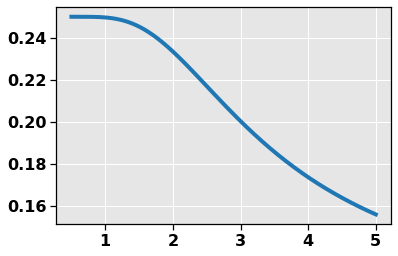

In [5]:
plt.plot(T, expMabs(T)/N)

,N,E,CV,Mabs,Chi,M
0,1,-1.818182,1.322314,0.909091,0.330579,0.909091
1,2,-1.980198,0.156847,0.990099,0.039212,0.990099
2,3,-1.992008,0.063681,0.997003,0.009954,-0.454545
3,4,-1.997000,0.023962,0.998800,0.004194,-0.529547
4,5,-1.995860,0.033051,0.998560,0.004492,-0.292497
5,6,-1.995922,0.032557,0.998648,0.004027,-0.085644
6,7,-1.996016,0.031815,0.998673,0.003969,0.003577


<AxesSubplot:xlabel='c'>

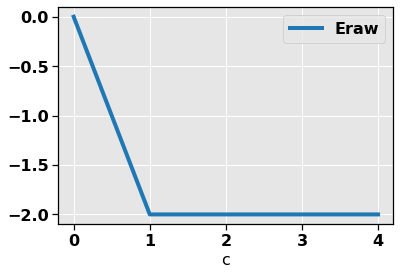

In [26]:
df = pd.read_csv("./2x2/2x2-equilibration.csv", comment='#')
df.iloc[:5].plot(x='c', y='Eraw')

E=-1.99598208593669, M=0.9986607327485997, cV=0.032082331864287994, chi=0.004010739516227435


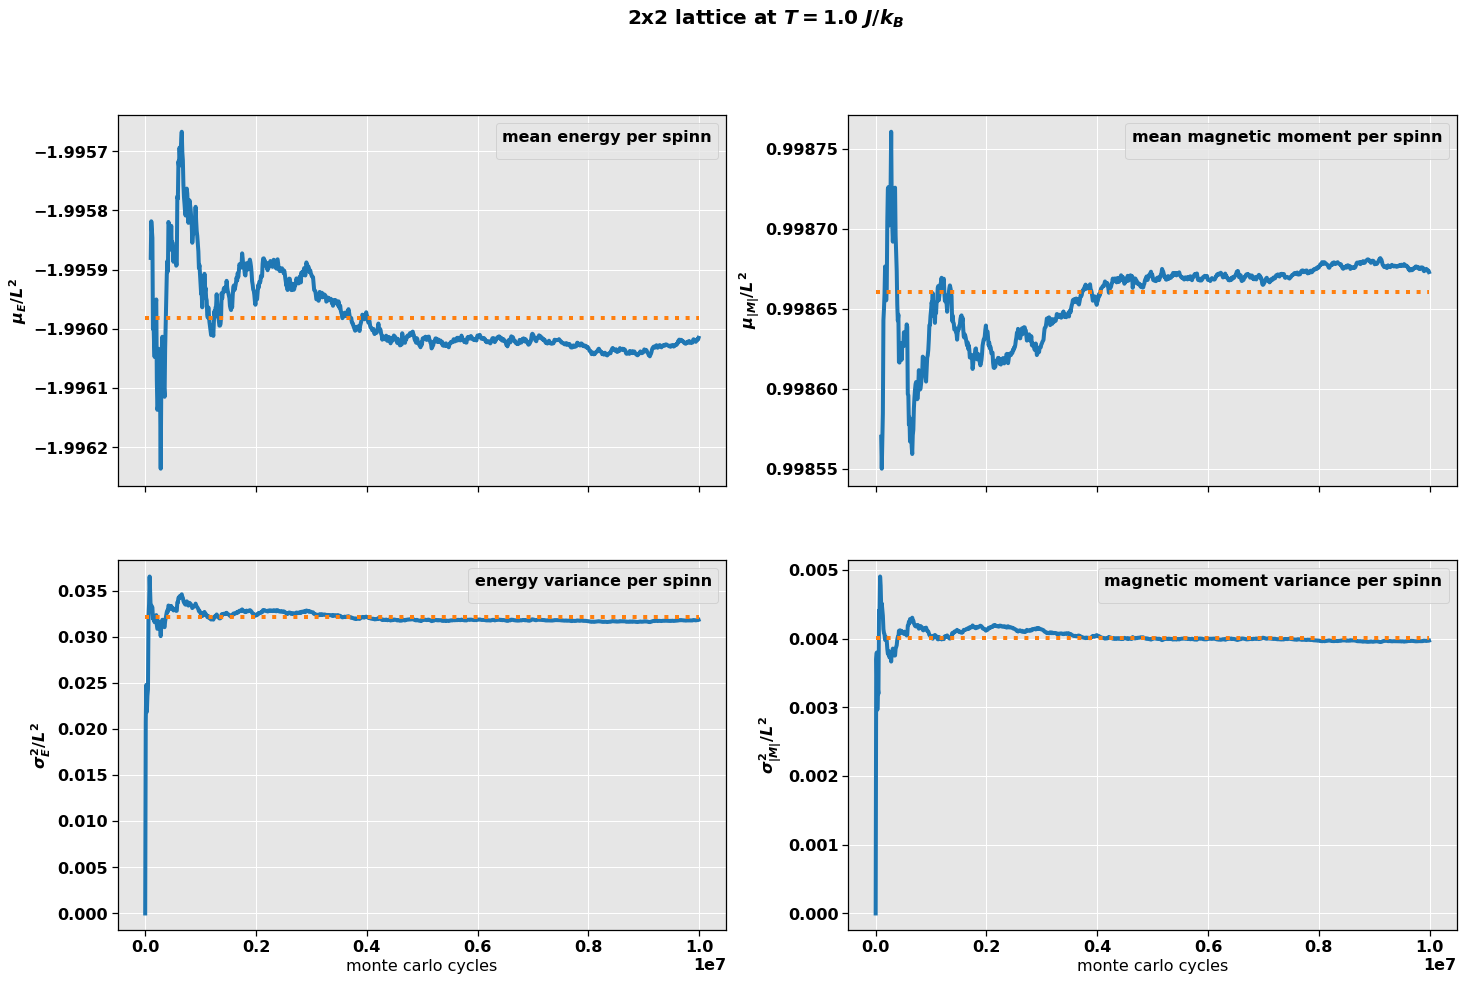

In [79]:
T = 1.0
E = expE(T)/4
M = expMabs(T)/4
cV = heat_capacity(T)/4
chi = susceptibility(T)/4
print(f'E={E}, M={M}, cV={cV}, chi={chi}')

df = pd.read_csv("./2x2/2x2.csv", comment='#')

cycles = int(df['c'].iloc[-1] + 1)
c = np.linspace(0,cycles)

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(24,15))
fig.suptitle('2x2 lattice at $T = 1.0$ $J/k_B$', weight='bold')

ax = axes[0,0]
df.iloc[10:].plot(x='c', y='E', ax=ax)
ax.plot(c, E+0*c, ':')
ax.legend([], title='mean energy per spinn', title_fontsize=MEDIUM)
ax.set_ylabel("$\mu_E/L^2$")

ax = axes[0,1]
df.iloc[10:].plot(x='c', y='Mabs', ax=ax)
ax.plot(c, M+0*c, ':')
ax.legend([], title='mean magnetic moment per spinn', title_fontsize=MEDIUM)
ax.set_ylabel("$\mu_{|M|}/L^2$")
#ax.set_ylim(.9986,.9988)

ax = axes[1,0]
df.plot(x='c', y='CV', ax=ax)
ax.plot(c, cV+0*c, ':')
ax.legend([], title='energy variance per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$\sigma^2_E/L^2$")

ax = axes[1,1]
df.plot(x='c', y='Chi', ax=ax)
ax.plot(c, chi+0*c, ':')
ax.legend([], title='magnetic moment variance per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$\sigma^2_{|M|}/L^2$")

plt.show()

,c,E,CV,Mabs,Chi,M,accs,Eraw
0,0.0,-2.000000,0.000000,1.000000,0.000000,1.000000,0.0,-2.0
1,10.0,-1.818182,0.229568,0.954545,0.034435,0.136364,0.0,-2.0
2,20.0,-1.714286,0.340136,0.904762,0.103930,-0.333333,0.0,-2.0
3,30.0,-1.806452,0.242803,0.935484,0.073708,-0.548387,0.0,-2.0
4,40.0,-1.658537,0.393284,0.890244,0.112036,-0.597561,1.0,0.0
...,...,...,...,...,...,...,...,...
995,9950.0,-1.649683,0.409143,0.884584,0.121545,0.061351,0.0,-2.0
996,9960.0,-1.649433,0.409362,0.884550,0.121513,0.060938,1.0,-2.0
997,9970.0,-1.649784,0.409037,0.884666,0.121413,0.059874,0.0,-2.0
998,9980.0,-1.649734,0.409074,0.884631,0.121465,0.058962,1.0,-2.0


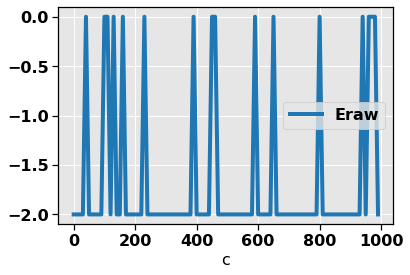

In [44]:
df = pd.read_csv("test.csv", comment='#')
df.iloc[:100].plot(x='c', y='Eraw')
df

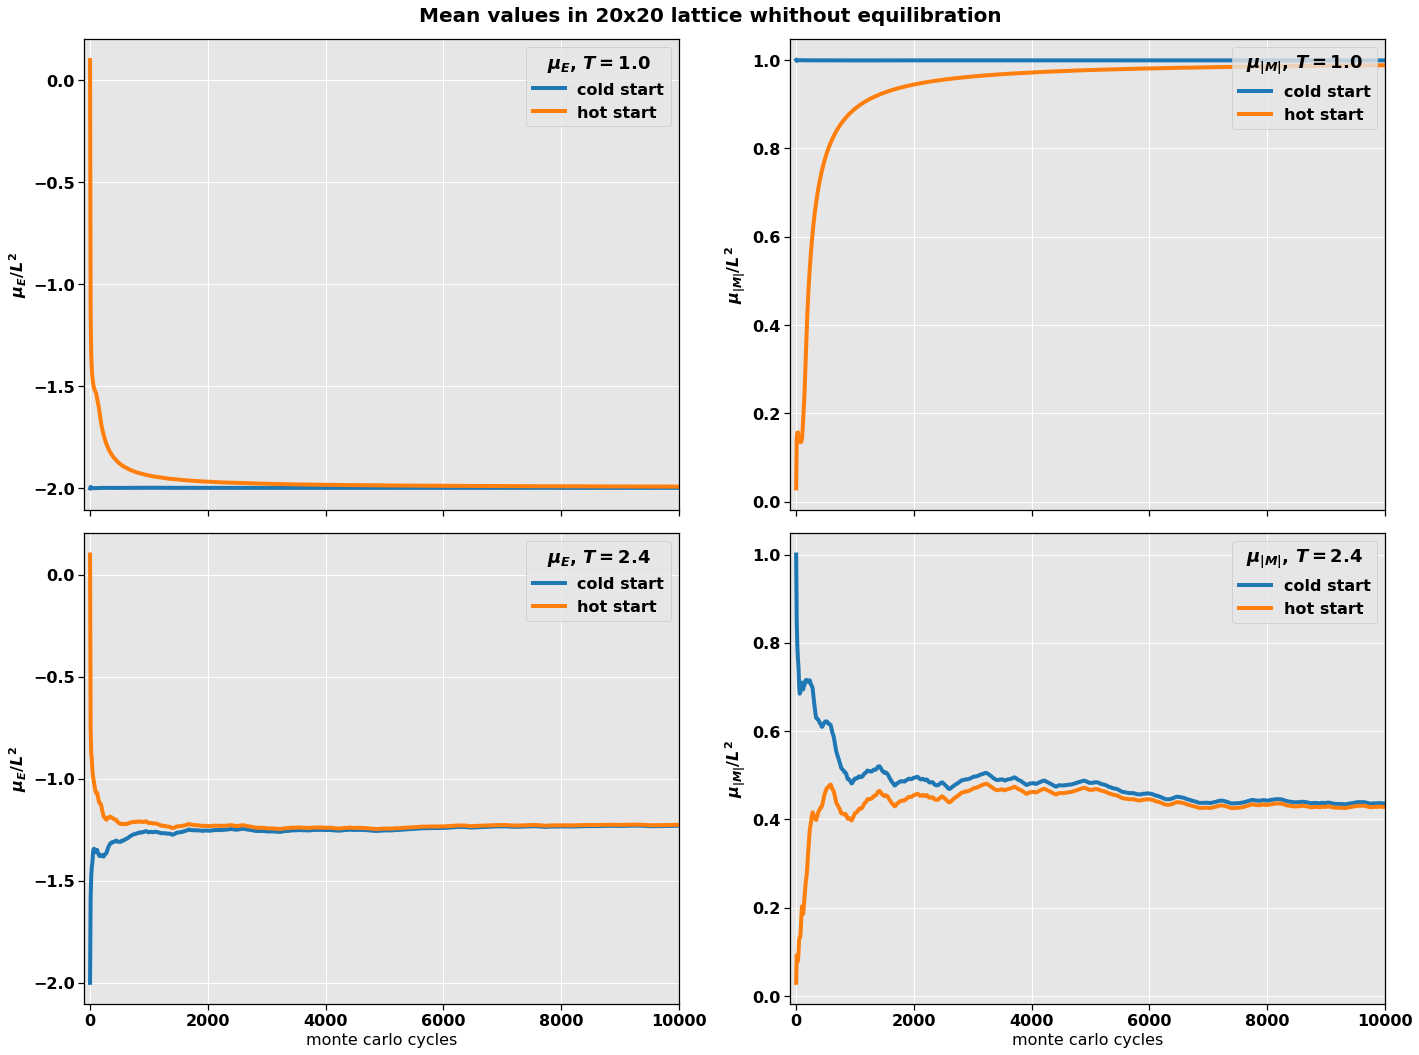

In [115]:
L20T1S0 = pd.read_csv("./20x20-hot-cold-start/L20T1S0.csv", comment='#')
L20T1S1 = pd.read_csv("./20x20-hot-cold-start/L20T1S1.csv", comment='#')

L20T24S0 = pd.read_csv("./20x20-hot-cold-start/L20T24S0.csv", comment='#')
L20T24S1 = pd.read_csv("./20x20-hot-cold-start/L20T24S1.csv", comment='#')

e_ylim = (-2.2,.5)
m_ylim = (-.1,1.5)
xlim = (-100,10000)

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=TWO_TIMES_TWO)
fig.suptitle('Mean values in 20x20 lattice whithout equilibration', weight='bold')

ax = axes[0,0]
L20T1S0.plot(x='c', y='E', ax=ax, label='cold start')
L20T1S1.plot(x='c', y='E', ax=ax, label='hot start')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$\mu_E$, $T=1.0$')
ax.set_ylabel("$\mu_{E}/L^2$")


ax = axes[1,0]
L20T24S0.plot(x='c', y='E', ax=ax, label='cold start')
L20T24S1.plot(x='c', y='E', ax=ax, label='hot start')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$\mu_E$, $T=2.4$')
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$\mu_{E}/L^2$")

ax = axes[0,1]
L20T1S0.plot(x='c', y='Mabs', ax=ax, label='cold start')
L20T1S1.plot(x='c', y='Mabs', ax=ax, label='hot start')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$\mu_{|M|}$, $T=1.0$')
ax.set_ylabel("$\mu_{|M|}/L^2$")


ax = axes[1,1]
L20T24S0.plot(x='c', y='Mabs', ax=ax, label='cold start')
L20T24S1.plot(x='c', y='Mabs', ax=ax, label='hot start')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$\mu_{|M|}$, $T=2.4$')
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$\mu_{|M|}/L^2$")

ax.set_xlim(*xlim)
plt.tight_layout()
plt.show()

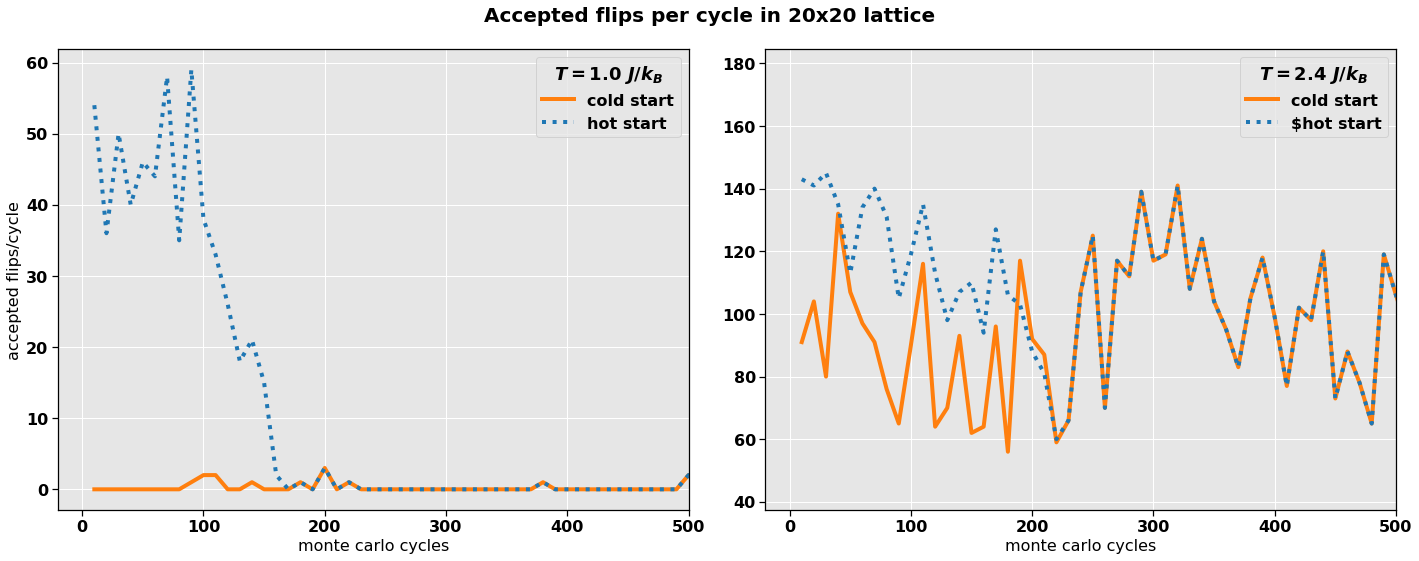

In [12]:
L20T1S0 = pd.read_csv("./20x20-hot-cold-start/L20T1S0.csv", comment='#')
L20T1S1 = pd.read_csv("./20x20-hot-cold-start/L20T1S1.csv", comment='#')
L20T24S0 = pd.read_csv("./20x20-hot-cold-start/L20T24S0.csv", comment='#')
L20T24S1 = pd.read_csv("./20x20-hot-cold-start/L20T24S1.csv", comment='#')

fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=TWO_TIMES_ONE)
fig.suptitle('Accepted flips per cycle in 20x20 lattice', weight='bold')

ax = axes[0]
L20T1S0.iloc[1:].plot(x='c', y='accs', ax=ax, label='cold start', color=COLORS[1])
L20T1S1.iloc[1:].plot(x='c', y='accs', ax=ax, label='hot start', color=COLORS[0], style=':')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$T=1.0$ $J/k_B$')
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("accepted flips/cycle")
#ax.set_yscale('log')

ax = axes[1]
L20T24S0.iloc[1:].plot(x='c', y='accs', ax=ax, label='cold start', color=COLORS[1])
L20T24S1.iloc[1:].plot(x='c', y='accs', ax=ax, label='$hot start', color=COLORS[0], style=':')
#ax.set_ylim(*e_ylim)
ax.set_xlim(-20,500)
ax.legend(loc='upper right', title='$T=2.4$ $J/k_B$')
ax.set_xlabel("monte carlo cycles")

#ax.set_xlim(-20,10000)


plt.tight_layout()
plt.show()

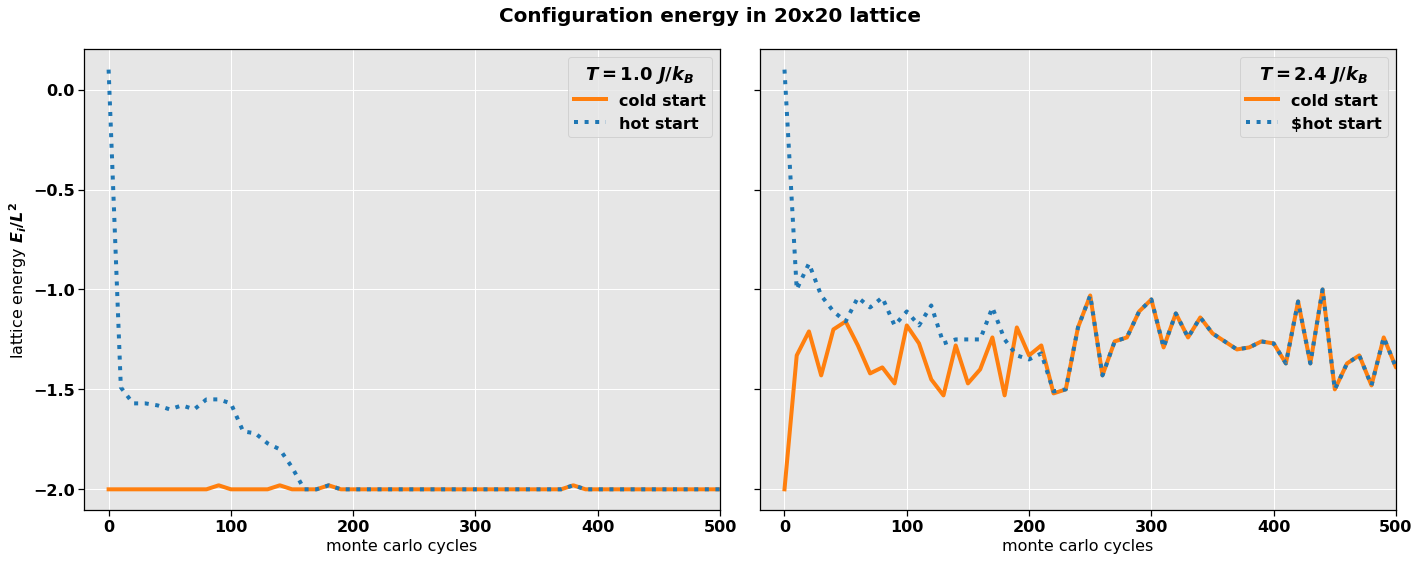

In [13]:
L20T1S0 = pd.read_csv("./20x20-hot-cold-start/L20T1S0.csv", comment='#')
L20T1S1 = pd.read_csv("./20x20-hot-cold-start/L20T1S1.csv", comment='#')
L20T24S0 = pd.read_csv("./20x20-hot-cold-start/L20T24S0.csv", comment='#')
L20T24S1 = pd.read_csv("./20x20-hot-cold-start/L20T24S1.csv", comment='#')

fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=TWO_TIMES_ONE)
fig.suptitle('Configuration energy in 20x20 lattice', weight='bold')

ax = axes[0]
L20T1S0.plot(x='c', y='Eraw', ax=ax, label='cold start', color=COLORS[1])
L20T1S1.plot(x='c', y='Eraw', ax=ax, label='hot start', color=COLORS[0], style=':')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$T=1.0$ $J/k_B$')
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("lattice energy $E_i/L^2$")

ax = axes[1]
L20T24S0.plot(x='c', y='Eraw', ax=ax, label='cold start', color=COLORS[1])
L20T24S1.plot(x='c', y='Eraw', ax=ax, label='$hot start', color=COLORS[0], style=':')
#ax.set_ylim(*e_ylim)
ax.set_xlabel("monte carlo cycles")
ax.set_xlim(-20,500)
ax.legend(loc='upper right', title='$T=2.4$ $J/k_B$')



plt.tight_layout()
plt.show()

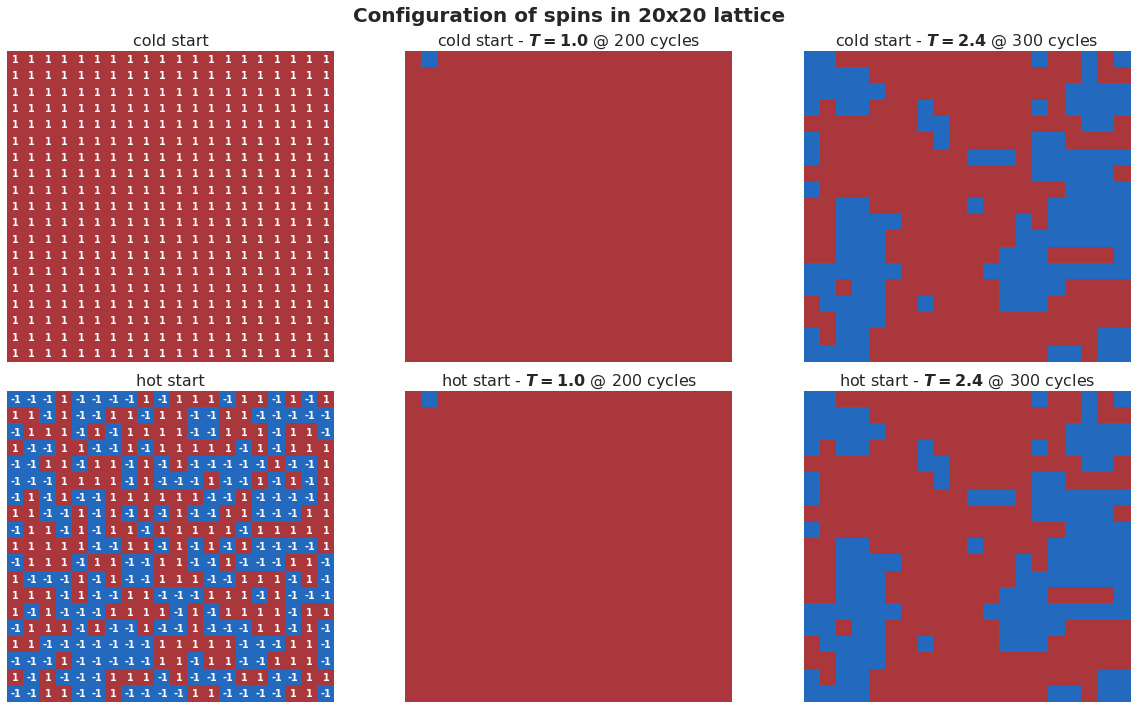

In [124]:
fig, axes = plt.subplots(ncols=3, nrows=2, sharex=True, sharey=True, figsize=(17,10))
fig.suptitle('Configuration of spins in 20x20 lattice', weight='bold')


hot_init = pd.read_csv("./20x20-hot-cold-start/init_hot_plot.csv", comment='#').to_numpy()
cold_init = pd.read_csv("./20x20-hot-cold-start/init_cold_plot.csv", comment='#').to_numpy()

hot1 = pd.read_csv("./20x20-hot-cold-start/1hot_plot.csv", comment='#').to_numpy()
cold1 = pd.read_csv("./20x20-hot-cold-start/1cold_plot.csv", comment='#').to_numpy()

hot24 = pd.read_csv("./20x20-hot-cold-start/24hot_plot.csv", comment='#').to_numpy()
cold24 = pd.read_csv("./20x20-hot-cold-start/24cold_plot.csv", comment='#').to_numpy()

vmin, vmax = -1, 1

ax = axes[0,0]
ax.set_title('cold start', fontsize=MEDIUM)
sns.heatmap(cold_init, annot=True, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
sns.set(font_scale=.8)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')

ax = axes[1,0]
ax.set_title('hot start', fontsize=MEDIUM)
sns.heatmap(hot_init, annot=True, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
sns.set(font_scale=.8)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')


ax = axes[0,1]
ax.set_title('cold start - $T=1.0$ @ 200 cycles', fontsize=MEDIUM)
sns.heatmap(cold1, annot=False, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')

ax = axes[1,1]
ax.set_title('hot start - $T=1.0$ @ 200 cycles', fontsize=MEDIUM)
sns.heatmap(hot1, annot=False, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')


ax = axes[0,2]
ax.set_title('cold start - $T=2.4$ @ 300 cycles', fontsize=MEDIUM)
sns.heatmap(cold24, annot=False, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')

ax = axes[1,2]
ax.set_title('hot start - $T=2.4$ @ 300 cycles', fontsize=MEDIUM)
sns.heatmap(hot24, annot=False, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()

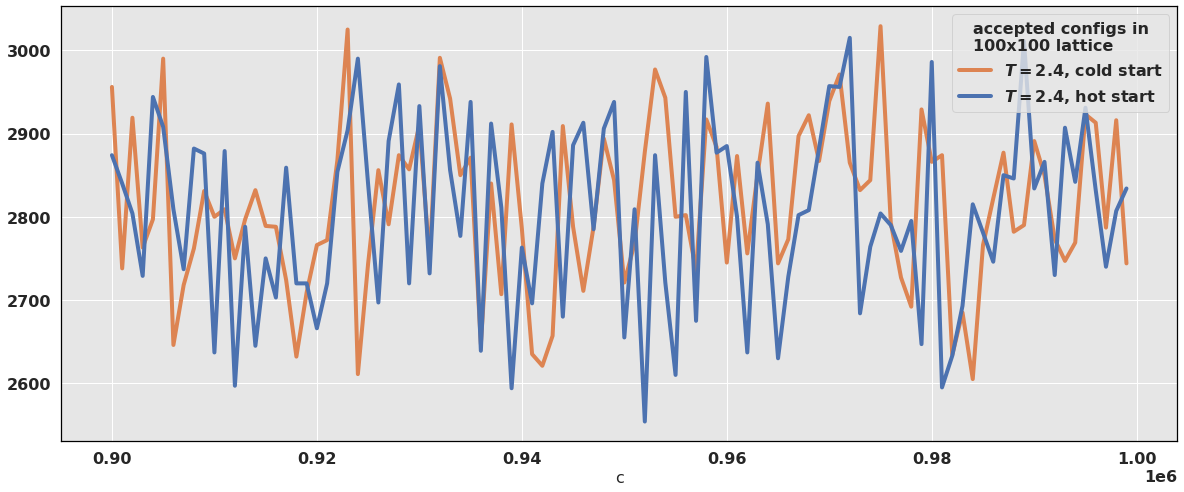

In [29]:
hot_vals = pd.read_csv("./100x100-hot-cold-start/hot_vals.csv", comment='#')
cold_vals = pd.read_csv("./100x100-hot-cold-start/cold_vals.csv", comment='#')

fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=TWO_TIMES_ONE)
ax = axes
cold_vals.iloc[-100:].plot(x='c', y='accs', ax=ax, label='$T=2.4$, cold start', color=COLORS[1])
hot_vals.iloc[-100:].plot(x='c', y='accs', ax=ax, label='$T=2.4$, hot start', color=COLORS[0])
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='accepted configs in\n100x100 lattice', title_fontsize=MEDIUM)

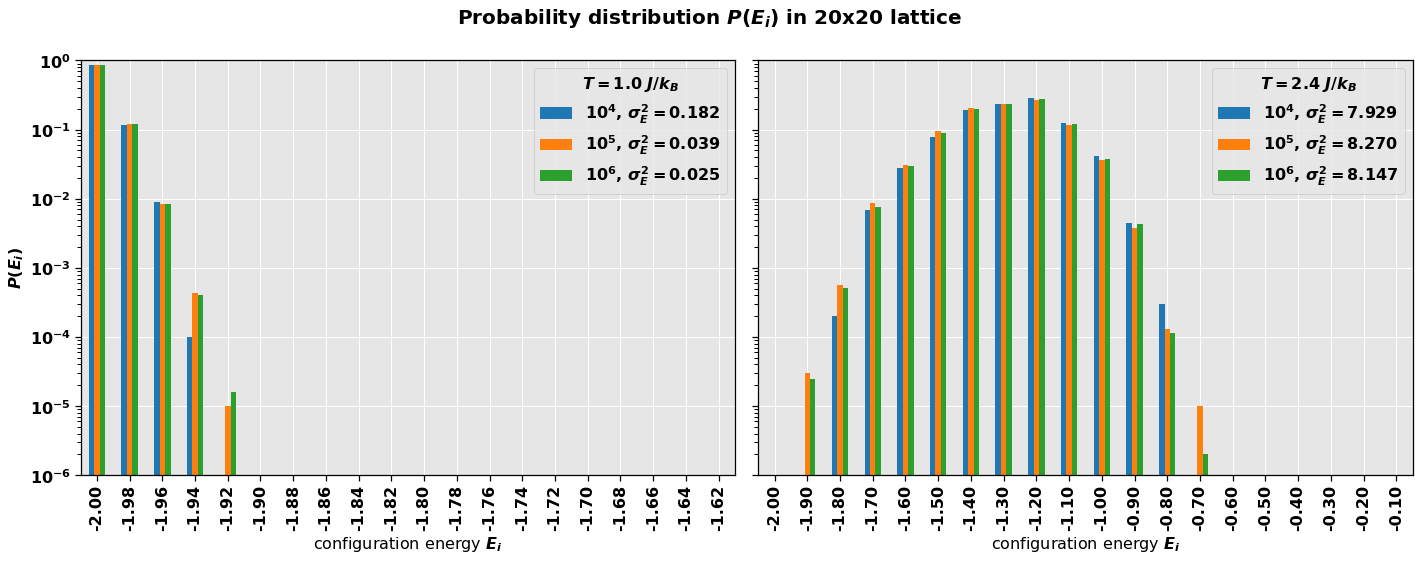

In [21]:
T1C4 = pd.read_csv('./probability-distribution/T1C4.csv', comment='#')
T1C5 = pd.read_csv('./probability-distribution/T1C5.csv', comment='#')
T1C6 = pd.read_csv('./probability-distribution/T1C6.csv', comment='#')
df1 = DataFrame()
df1['E'] = T1C4['E']
df1['$10^4$'] = T1C4['p']
df1['$10^5$'] = T1C5['p']
df1['$10^6$'] = T1C6['p']

T24C4 = pd.read_csv('./probability-distribution/T24C4.csv', comment='#')
T24C5 = pd.read_csv('./probability-distribution/T24C5.csv', comment='#')
T24C6 = pd.read_csv('./probability-distribution/T24C6.csv', comment='#')
df24 = DataFrame()
df24['E'] = T24C4['E']
df24['$10^4$'] = T24C4['p']
df24['$10^5$'] = T24C5['p']
df24['$10^6$'] = T24C6['p']

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=TWO_TIMES_ONE)
fig.suptitle('Probability distribution $P(E_i)$ in 20x20 lattice', weight='bold')

ax = axes[0]
bins = 20
df1.iloc[:bins].plot(x='E', ax=ax, kind='bar', rot=90, fontsize=MEDIUM)
ax.set_xticklabels([f'{v:.2f}' for v in df1['E'].iloc[:bins]])
ax.set_xlabel('configuration energy $E_i$')
ax.legend(['$10^4$, $\sigma^2_E=0.182$', '$10^5$, $\sigma^2_E=0.039$', '$10^6$, $\sigma^2_E=0.025$', ], title='$T=1.0$ $J/k_B$', loc='upper right', title_fontsize=MEDIUM)

ax = axes[1]
bins = 20
df24.iloc[:bins].plot(x='E', ax=ax, kind='bar', rot=90, fontsize=MEDIUM)
ax.set_xticklabels([f'{v:.2f}' for v in df24['E'].iloc[:bins]])
ax.set_xlabel('configuration energy $E_i$')
ax.legend(['$10^4$, $\sigma^2_E=7.929$', '$10^5$, $\sigma^2_E=8.270$', '$10^6$, $\sigma^2_E=8.147$', ], title='$T=2.4$ $J/k_B$', loc='upper right', title_fontsize=MEDIUM)

ax = axes[0]
ax.set_ylim(1e-6,1)
ax.set_yscale('log')
ax.set_ylabel(r'$P(E_i)$', fontsize=MEDIUM)

plt.tight_layout()
plt.show()

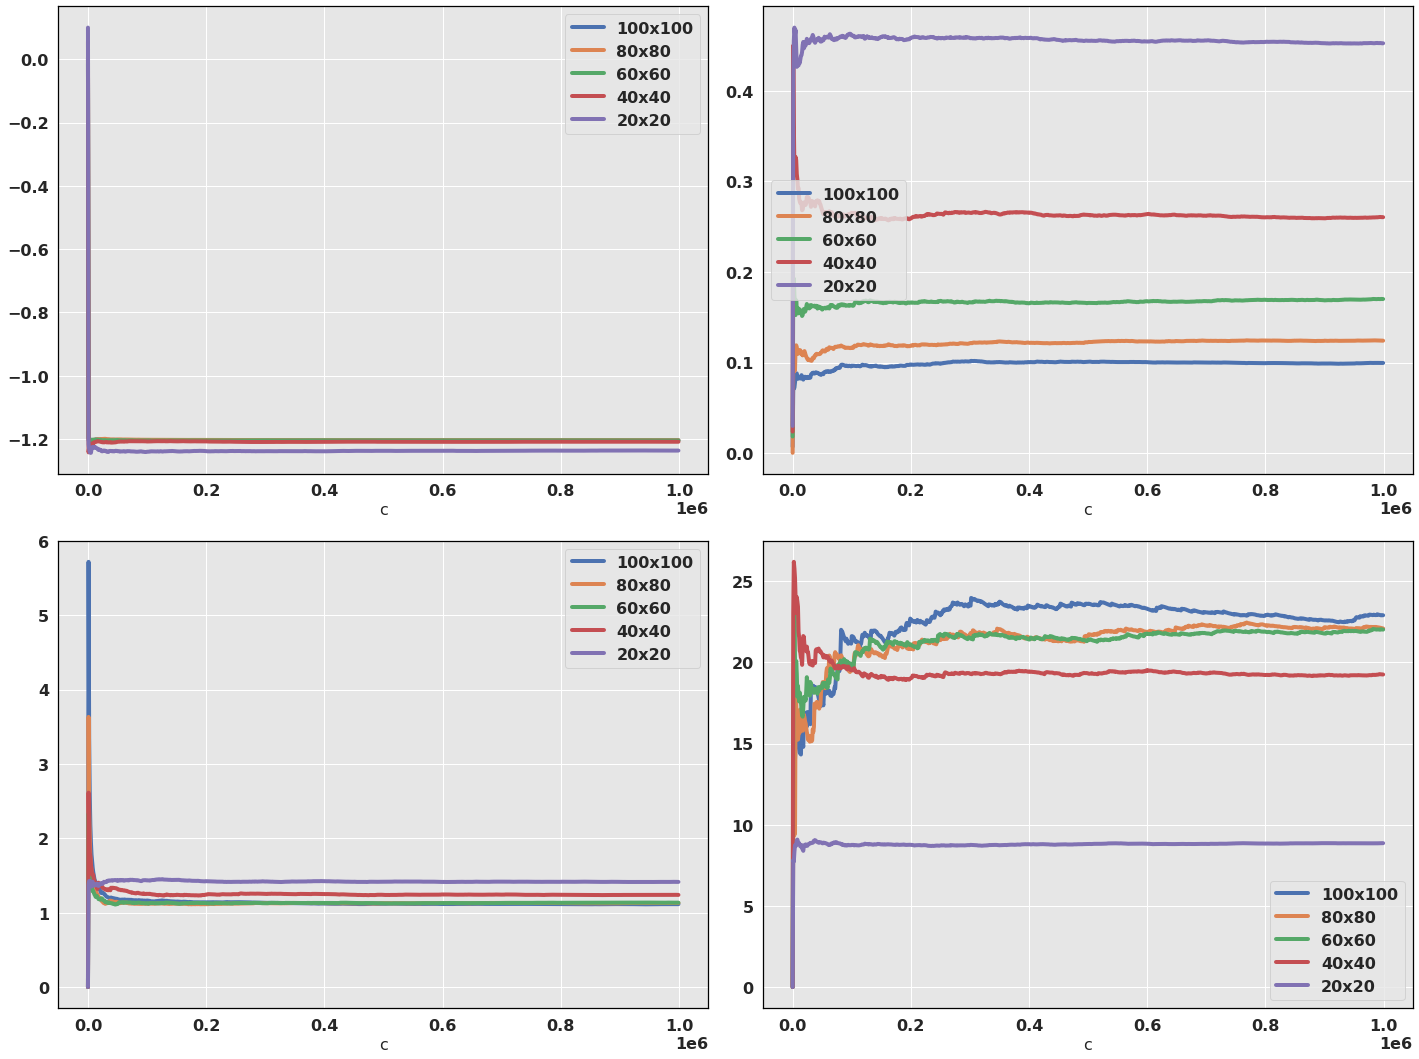

In [31]:
df100 = pd.read_csv("./1e6-runs/100x100.csv", comment='#')
df80 = pd.read_csv("./1e6-runs/80x80.csv", comment='#')
df60 = pd.read_csv("./1e6-runs/60x60.csv", comment='#')
df40 = pd.read_csv("./1e6-runs/40x40.csv", comment='#')
df20 = pd.read_csv("./1e6-runs/20x20.csv", comment='#')

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=TWO_TIMES_TWO)
ax = axes[0,0]
df100.plot(x='c', y='E', ax=ax, label='100x100')
df80.plot(x='c', y='E', ax=ax, label='80x80')
df60.plot(x='c', y='E', ax=ax, label='60x60')
df40.plot(x='c', y='E', ax=ax, label='40x40')
df20.plot(x='c', y='E', ax=ax, label='20x20')

ax = axes[0,1]
df100.plot(x='c', y='Mabs', ax=ax, label='100x100')
df80.plot(x='c', y='Mabs', ax=ax, label='80x80')
df60.plot(x='c', y='Mabs', ax=ax, label='60x60')
df40.plot(x='c', y='Mabs', ax=ax, label='40x40')
df20.plot(x='c', y='Mabs', ax=ax, label='20x20')


ax = axes[1,0]
df100.plot(x='c', y='CV', ax=ax, label='100x100')
df80.plot(x='c', y='CV', ax=ax, label='80x80')
df60.plot(x='c', y='CV', ax=ax, label='60x60')
df40.plot(x='c', y='CV', ax=ax, label='40x40')
df20.plot(x='c', y='CV', ax=ax, label='20x20')

ax = axes[1,1]
df100.plot(x='c', y='Chi', ax=ax, label='100x100')
df80.plot(x='c', y='Chi', ax=ax, label='80x80')
df60.plot(x='c', y='Chi', ax=ax, label='60x60')
df40.plot(x='c', y='Chi', ax=ax, label='40x40')
df20.plot(x='c', y='Chi', ax=ax, label='20x20')

plt.tight_layout()
plt.show()

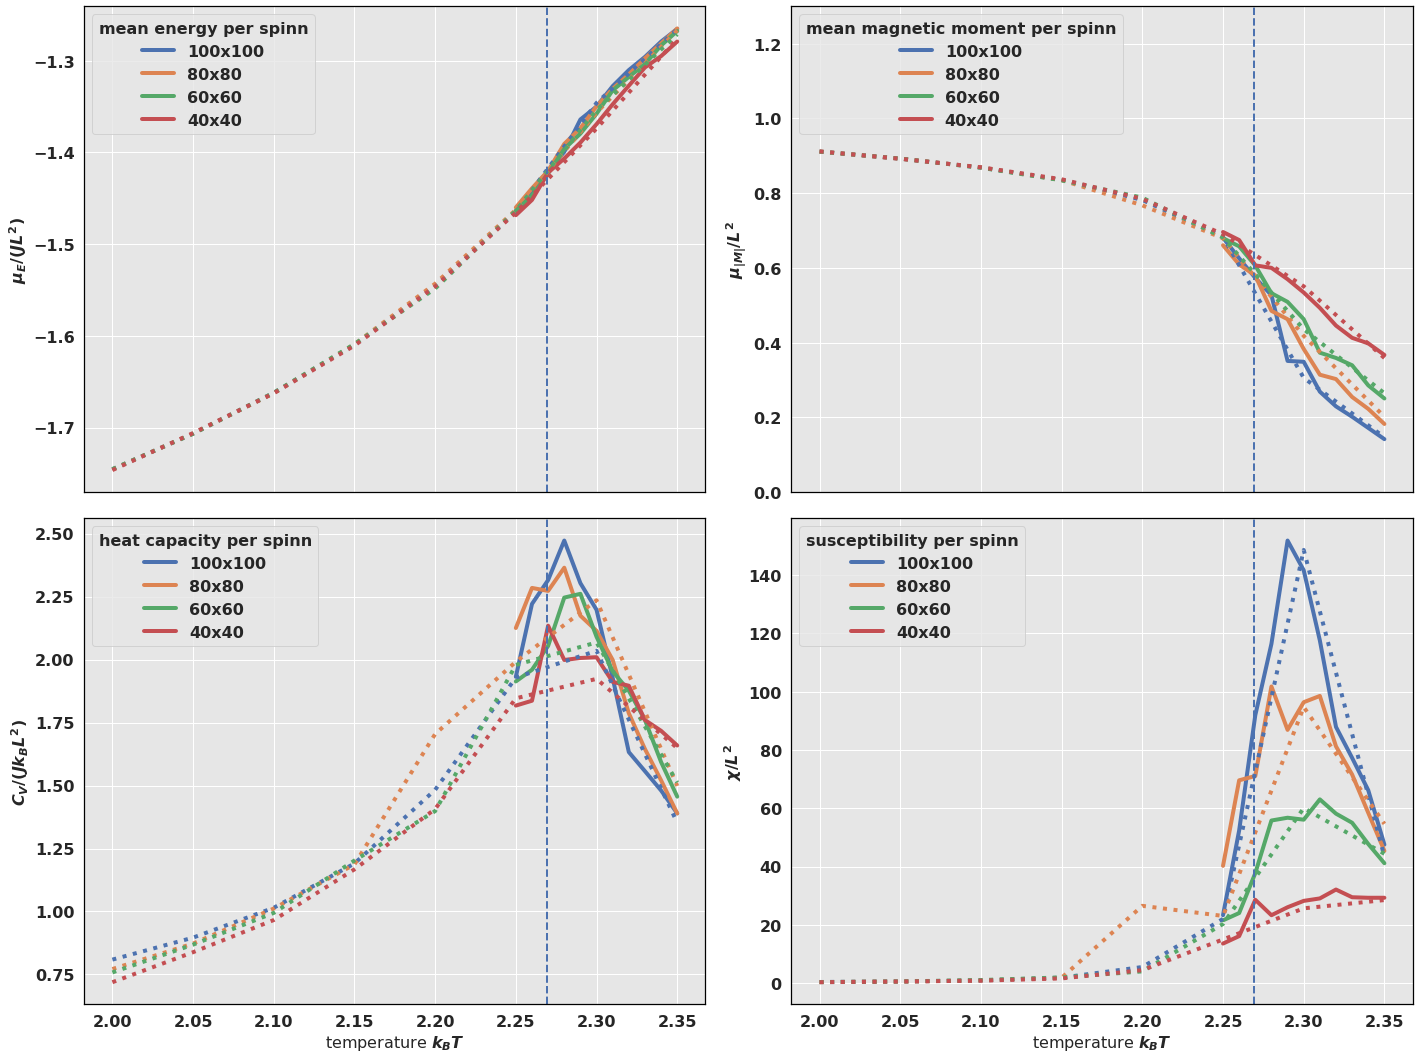

In [32]:
df40_01 = pd.read_csv("./critical-temperature/iter-01_40.csv", comment='#')
df60_01 = pd.read_csv("./critical-temperature/iter-01_60.csv", comment='#')
df80_01 = pd.read_csv("./critical-temperature/iter-01_80.csv", comment='#')
df100_01 = pd.read_csv("./critical-temperature/iter-01_100.csv", comment='#')

df40_02 = pd.read_csv("./critical-temperature/iter-02_40.csv", comment='#')
df60_02 = pd.read_csv("./critical-temperature/iter-02_60.csv", comment='#')
df80_02 = pd.read_csv("./critical-temperature/iter-02_80.csv", comment='#')
df100_02 = pd.read_csv("./critical-temperature/iter-02_100.csv", comment='#')

dfs_01 = (df100_01, df80_01, df60_01, df40_01)
dfs_02 = (df100_02, df80_02, df60_02, df40_02)
names = ('100x100', '80x80', '60x60', '40x40')

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=TWO_TIMES_TWO)

for i, (df, name) in enumerate(zip(dfs_02, names)):
    ax = axes[0,0]
    df.plot(x='T', y='E', ax=ax, color=COLORS[i])
    ax = axes[0,1]
    df.plot(x='T', y='Mabs', ax=ax, color=COLORS[i])
    ax = axes[1,0]
    df.plot(x='T', y='CV', ax=ax, color=COLORS[i])
    ax = axes[1,1]
    df.plot(x='T', y='Chi', ax=ax, color=COLORS[i])

for i, (df, name) in enumerate(zip(dfs_01, names)):
    ax = axes[0,0]
    df.plot(x='T', y='E', ax=ax, style=':', color=COLORS[i])
    ax = axes[0,1]
    df.plot(x='T', y='Mabs', ax=ax, style=':', color=COLORS[i])
    ax = axes[1,0]
    df.plot(x='T', y='CV', ax=ax, style=':', color=COLORS[i])
    ax = axes[1,1]
    df.plot(x='T', y='Chi', ax=ax, style=':', color=COLORS[i])
    
    
ax = axes[0,0]
ax.legend(names, title='mean energy per spinn', title_fontsize=MEDIUM)
ax.set_ylabel("$\mu_E/(JL^2)$")
ax.axvline(x=2.269, linestyle='--', linewidth=2)

ax = axes[0,1]
ax.legend(names, title='mean magnetic moment per spinn', title_fontsize=MEDIUM)
ax.set_ylabel("$\mu_{|M|}/L^2$")
ax.set_ylim(0,1.3)
ax.axvline(x=2.269, linestyle='--', linewidth=2)

ax = axes[1,0]
ax.legend(names, title='heat capacity per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("temperature $k_BT$")
ax.set_ylabel("$C_V/(Jk_BL^2)$")
ax.axvline(x=2.269, linestyle='--', linewidth=2)

ax = axes[1,1]
ax.legend(names, title='susceptibility per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("temperature $k_BT$")
ax.set_ylabel("$\chi/L^2$")
ax.axvline(x=2.269, linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

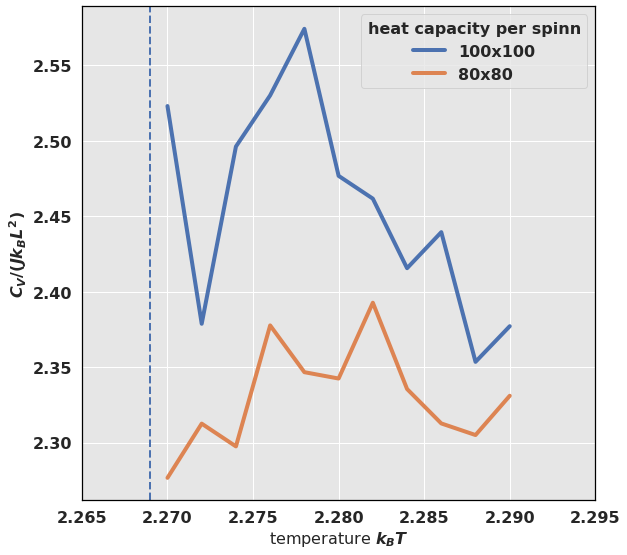

TC=2.2620000000000005


In [33]:
df80_03 = pd.read_csv("./critical-temperature/iter-03_80.csv", comment='#')
df100_03 = pd.read_csv("./critical-temperature/iter-03_100.csv", comment='#')

names = ('100x100', '80x80')

fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=ONE_TIMES_ONE)

ax = axes
df100_03.plot(x='T', y='CV', ax=ax, color=COLORS[0])
df80_03.plot(x='T', y='CV', ax=ax, color=COLORS[1])

ax.legend(names, title='heat capacity per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("temperature $k_BT$")
ax.set_ylabel("$C_V/(Jk_BL^2)$")
ax.axvline(x=2.269, linestyle='--', linewidth=2)
ax.set_xlim(2.265,2.295)

plt.tight_layout()
plt.show()

print(rf'TC={(100*2.278 - 80*2.282)/(100 - 80)}')

In [34]:
df80_03 = pd.read_csv("./critical-temperature/iter-03_80.csv", comment='#')
df100_03 = pd.read_csv("./critical-temperature/iter-03_100.csv", comment='#')

df80_03, df100_03

(        T         E        CV      Mabs         Chi         M
 0   2.270 -1.421752  2.276680  0.589581   63.623359  0.117264
 1   2.272 -1.416491  2.312605  0.574369   68.666424  0.012389
 2   2.274 -1.411906  2.297521  0.565318   67.697361 -0.037719
 3   2.276 -1.404467  2.377696  0.530619   89.721905 -0.019995
 4   2.278 -1.401817  2.346705  0.532378   84.448400 -0.135105
 5   2.280 -1.397279  2.342496  0.518712   91.337831  0.051861
 6   2.282 -1.392372  2.392734  0.504864   92.709605  0.002509
 7   2.284 -1.387577  2.335545  0.490674   96.584230  0.091769
 8   2.286 -1.383578  2.312736  0.478423   98.496042  0.057479
 9   2.288 -1.378437  2.305046  0.469345   93.508365 -0.021421
 10  2.290 -1.375171  2.331075  0.456407  105.177741 -0.146155,
         T         E        CV      Mabs         Chi         M
 0   2.270 -1.417595  2.523071  0.550336  127.383424 -0.169162
 1   2.272 -1.414798  2.378788  0.560477   91.373558 -0.040682
 2   2.274 -1.409462  2.496225  0.536795  119.020110 -